In [64]:
set.seed(31337)
startingValue <- 3

OneYear <- function(startingValue) {
    rawProbs <- runif(100, 0, 1)
    rawOdds <- rep(1, length(rawProbs))

    rawOdds[rawProbs < 0.25] = 0.9
    rawOdds[rawOdds == 1] = 1.1

    Reduce("*", rawOdds) * startingValue
}

In [87]:
# Simulate 100 thousand combinations with 75% wins / 25% losses, occurring in uniformly random order
sim <- replicate(100000, OneYear(startingValue))

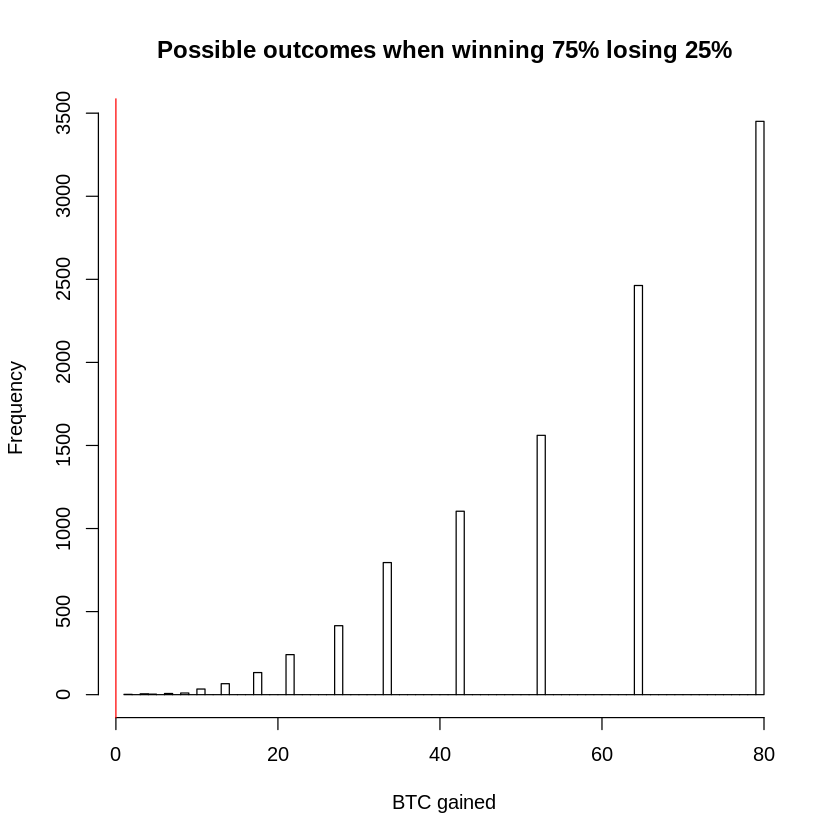

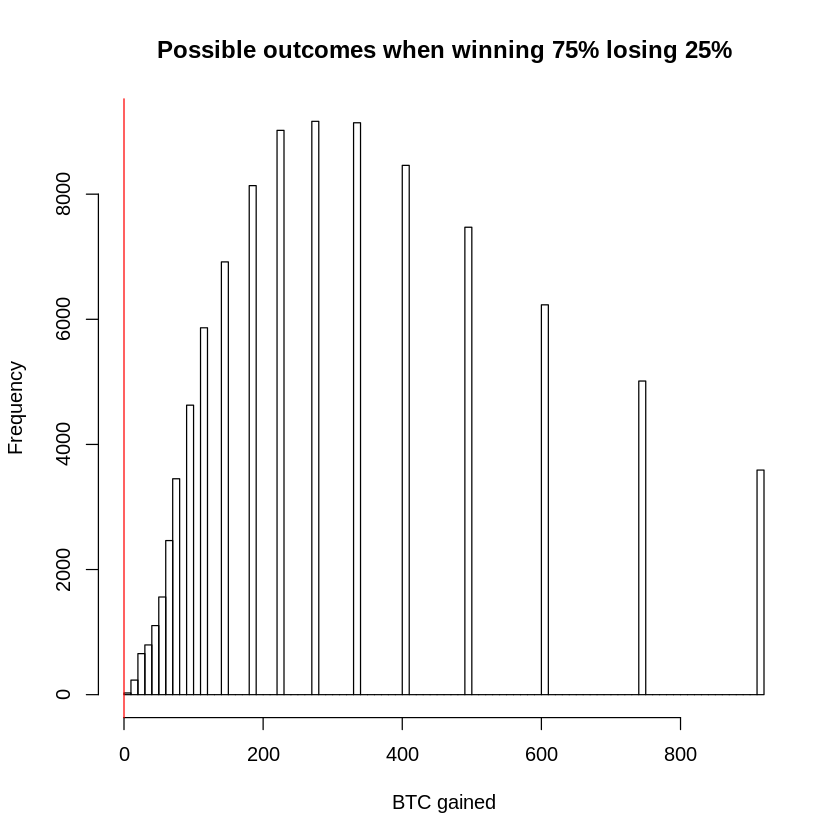

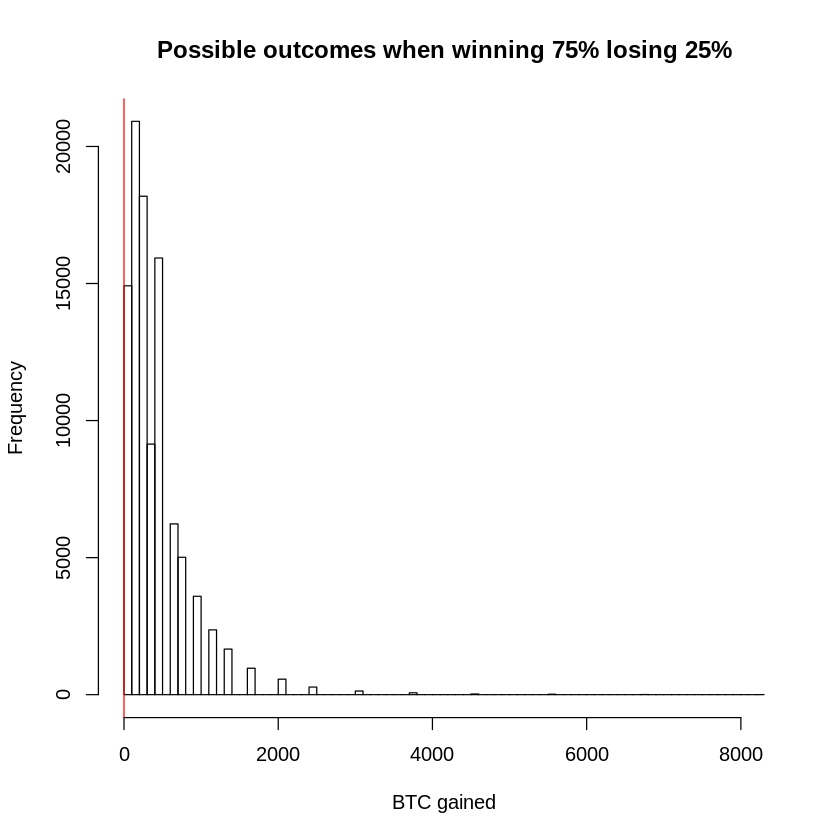

In [112]:
histSeq <- function(cutoff) {
    hist(sim[sim<cutoff]-startingValue, 90, xlab="BTC gained", main="Possible outcomes when winning 75% losing 25%")
    abline(v=0, col="red")
}

z <- sapply(c(100, 1000, 10000), histSeq)

In [235]:
startingValue <- 1

MultWithMaxBet <- function(MaxBet) {
    Mult <- function(X, Y) {
        z <- X*Y
        if(X*startingValue>MaxBet){
            z = X*startingValue - MaxBet + MaxBet*Y
            z = z/startingValue
        }
        z
    }
}

Better <- function(MaxBet) {
    Reduce(MultWithMaxBet(MaxBet), x) * startingValue - startingValue
}

plotGainByBetSize <- function(xaxis){
    plot(xaxis, sapply(xaxis, Better), ylab="Gain", xlab="Max bet size", main=paste("Gain by bet size, assuming starting bet", startingValue))
}


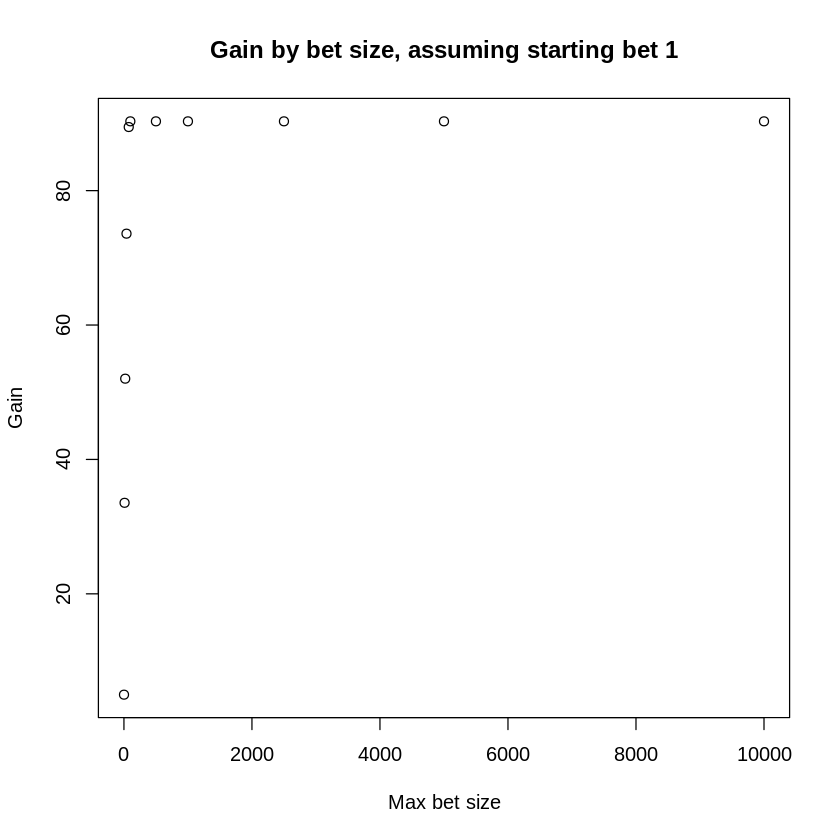

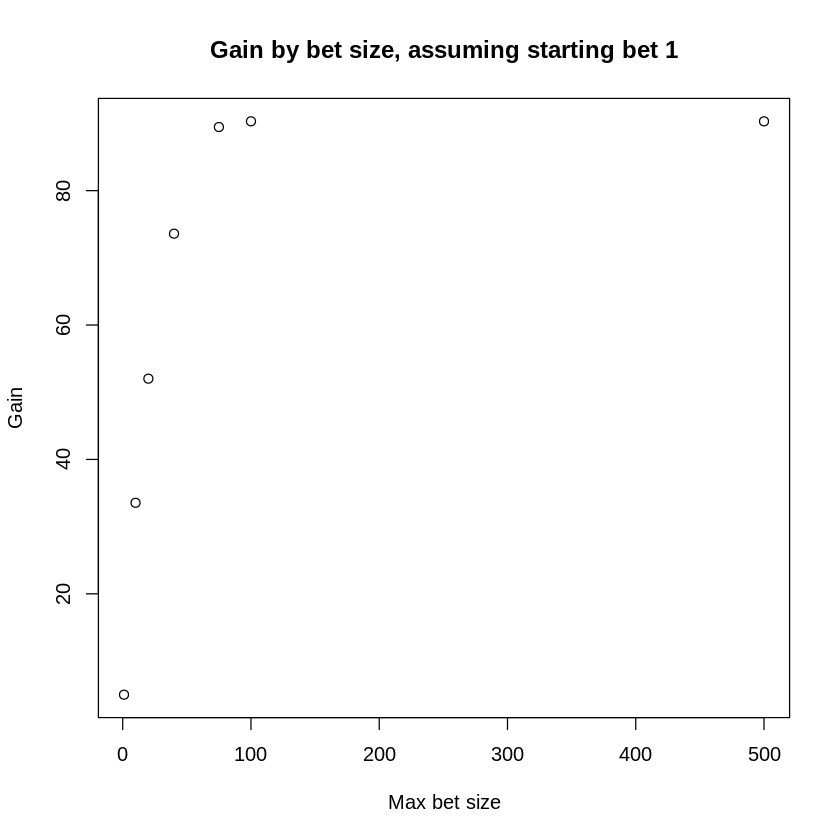

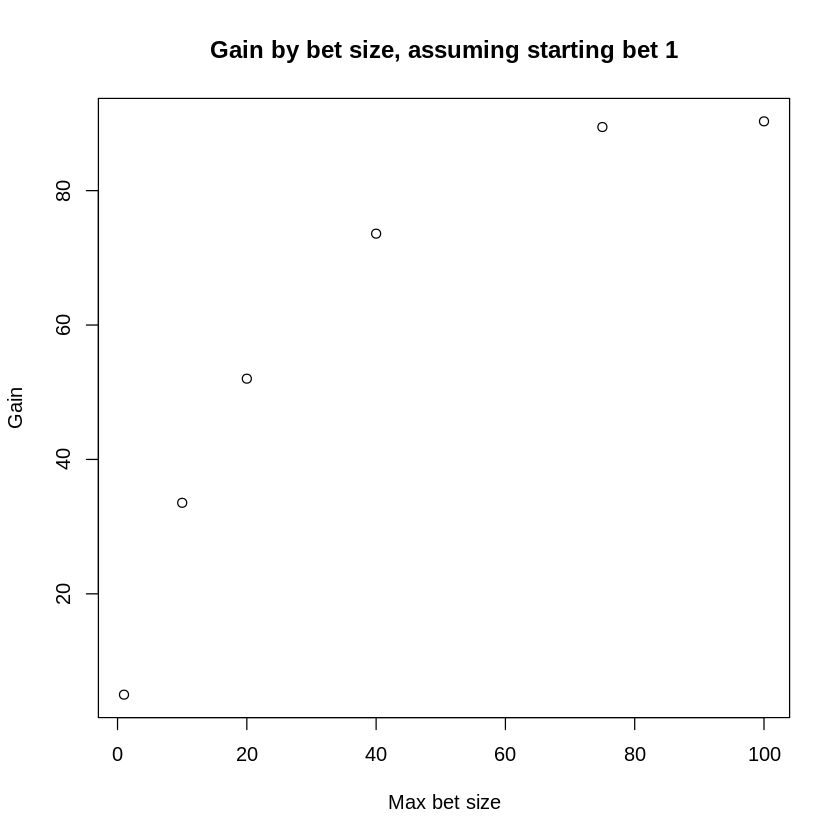

In [237]:
x <- numeric()
x <- c(x, rep(1.1, 37))
x <- c(x, rep(0.9, 25))
x <- c(x, rep(1.1, 38))

plotGainByBetSize(c(1, 10, 20, 40, 75, 100, 500, 1000, 2500, 5000, 10000))
plotGainByBetSize(c(1, 10, 20, 40, 75, 100, 500))
plotGainByBetSize(c(1, 10, 20, 40, 75, 100))